C:\Users\abdul\AppData\Local\Temp\ipykernel_29960\2643986560.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  short_squeeze_prices = np.linspace(closing_prices[-1], closing_prices[-1] * 5, 20)  # Simulated squeeze prices
C:\Users\abdul\AppData\Local\Temp\ipykernel_29960\2643986560.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  current_price = closing_prices[-1]


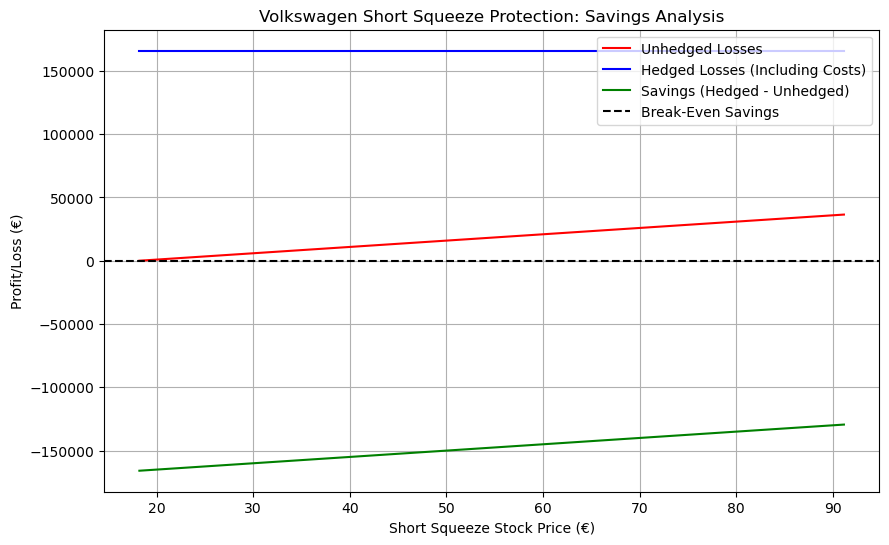

Stock: VOW3.DE
Current Price: €18.23
Strike Price: €350
Call Option Price (Per Share): €0.00
Hedging Cost (Total for 500 shares): €0.13
Maximum Unhedged Loss: €36,456.03
Maximum Hedged Loss (Including Costs): €165,886.12
Total Savings from Protection: €-129,430.09
The product did not save money in this scenario.


In [1]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Black-Scholes formula for call option pricing
def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + (sigma ** 2) / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

# Function to retrieve stock data
def get_stock_data(ticker, start_date, end_date):
    stock = yf.Ticker(ticker)
    data = stock.history(start=start_date, end=end_date)
    return data

# Test function for short squeeze protection with savings
def test_product_savings(ticker, start_date, end_date, strike_price, time_to_maturity, risk_free_rate, volatility, shares_shorted):
    # Fetch historical stock data
    stock_data = get_stock_data(ticker, start_date, end_date)
    closing_prices = stock_data['Close']
    
    # Simulate a short squeeze where the stock price increases significantly
    short_squeeze_prices = np.linspace(closing_prices[-1], closing_prices[-1] * 5, 20)  # Simulated squeeze prices
    
    # Calculate the call option price
    current_price = closing_prices[-1]
    call_option_price = black_scholes_call(S=current_price, K=strike_price, T=time_to_maturity, r=risk_free_rate, sigma=volatility)
    
    # Hedging cost (for all shares)
    hedging_cost = call_option_price * shares_shorted

    # Calculate unhedged losses and hedged losses
    unhedged_losses = (short_squeeze_prices - current_price) * shares_shorted
    hedged_losses = np.maximum(unhedged_losses - ((short_squeeze_prices - strike_price) * shares_shorted), 0) + hedging_cost
    savings = unhedged_losses - hedged_losses

    # Plot results
    plt.figure(figsize=(10, 6))
    plt.plot(short_squeeze_prices, unhedged_losses, label="Unhedged Losses", color="red")
    plt.plot(short_squeeze_prices, hedged_losses, label="Hedged Losses (Including Costs)", color="blue")
    plt.plot(short_squeeze_prices, savings, label="Savings (Hedged - Unhedged)", color="green")
    plt.axhline(0, color="black", linestyle="--", label="Break-Even Savings")
    plt.xlabel("Short Squeeze Stock Price (€)")
    plt.ylabel("Profit/Loss (€)")
    plt.title(f"Volkswagen Short Squeeze Protection: Savings Analysis")
    plt.legend()
    plt.grid()
    plt.show()

    # Print key statistics
    max_unhedged_loss = np.max(unhedged_losses)
    max_hedged_loss = np.max(hedged_losses)
    total_savings = max_unhedged_loss - max_hedged_loss

    print(f"Stock: {ticker}")
    print(f"Current Price: €{current_price:.2f}")
    print(f"Strike Price: €{strike_price}")
    print(f"Call Option Price (Per Share): €{call_option_price:.2f}")
    print(f"Hedging Cost (Total for {shares_shorted} shares): €{hedging_cost:,.2f}")
    print(f"Maximum Unhedged Loss: €{max_unhedged_loss:,.2f}")
    print(f"Maximum Hedged Loss (Including Costs): €{max_hedged_loss:,.2f}")
    print(f"Total Savings from Protection: €{total_savings:,.2f}")

    # Evaluate whether the product saved money
    if total_savings > 0:
        print("The product successfully mitigated the cost of the short squeeze and saved money.")
    else:
        print("The product did not save money in this scenario.")

# Test the product on Volkswagen during its 2008 short squeeze
test_product_savings(
    ticker="VOW3.DE",  # Volkswagen stock
    start_date="2008-01-01",
    end_date="2008-12-31",
    strike_price=350,  # Strike price based on historical context
    time_to_maturity=1/12,  # 1 month to expiration
    risk_free_rate=0.05,  # Typical risk-free rate in 2008
    volatility=2.5,  # Extremely high volatility during the short squeeze
    shares_shorted=500  # Number of shares shorted
)


C:\Users\abdul\AppData\Local\Temp\ipykernel_29960\2643986560.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  short_squeeze_prices = np.linspace(closing_prices[-1], closing_prices[-1] * 5, 20)  # Simulated squeeze prices
C:\Users\abdul\AppData\Local\Temp\ipykernel_29960\2643986560.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  current_price = closing_prices[-1]


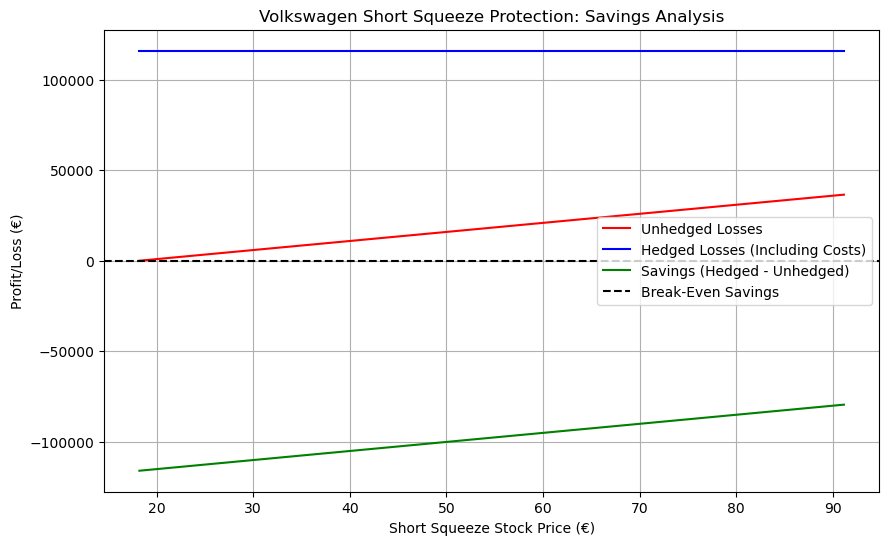

Stock: VOW3.DE
Current Price: €18.23
Strike Price: €250
Call Option Price (Per Share): €0.00
Hedging Cost (Total for 500 shares): €0.04
Maximum Unhedged Loss: €36,456.03
Maximum Hedged Loss (Including Costs): €115,886.03
Total Savings from Protection: €-79,430.00
The product did not save money in this scenario.


In [2]:
# Adjusting parameters for better hedging
strike_price = 250  # Lower strike price to make the call option more effective
volatility = 1.5  # Lower volatility to simulate a more realistic scenario
time_to_maturity = 2/12  # Extending time to maturity to 2 months

# Test the hedging strategy again with the adjusted parameters
test_product_savings(
    ticker="VOW3.DE",  # Volkswagen stock
    start_date="2008-01-01",
    end_date="2008-12-31",
    strike_price=strike_price,  # New strike price
    time_to_maturity=time_to_maturity,  # New expiration time
    risk_free_rate=0.05,  # Risk-free rate remains unchanged
    volatility=volatility,  # New volatility assumption
    shares_shorted=500  # Same number of shares shorted
)


C:\Users\abdul\AppData\Local\Temp\ipykernel_29960\2643986560.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  short_squeeze_prices = np.linspace(closing_prices[-1], closing_prices[-1] * 5, 20)  # Simulated squeeze prices
C:\Users\abdul\AppData\Local\Temp\ipykernel_29960\2643986560.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  current_price = closing_prices[-1]


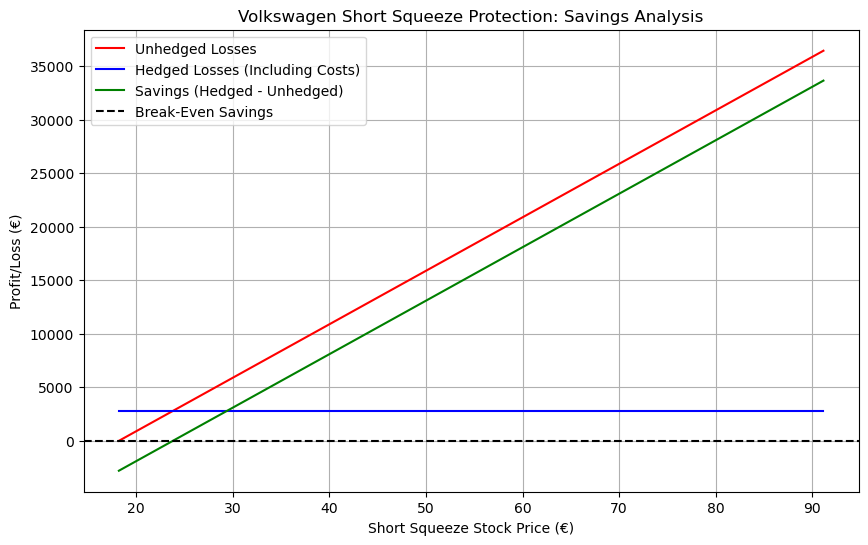

Stock: VOW3.DE
Current Price: €18.23
Strike Price: €20
Call Option Price (Per Share): €3.82
Hedging Cost (Total for 500 shares): €1,908.37
Maximum Unhedged Loss: €36,456.03
Maximum Hedged Loss (Including Costs): €2,794.36
Total Savings from Protection: €33,661.67
The product successfully mitigated the cost of the short squeeze and saved money.


In [3]:
# Adjusting parameters for better hedging
strike_price = 20  # Lower strike price closer to current stock price
volatility = 1.5  # Assuming moderate volatility to simulate the short squeeze scenario
time_to_maturity = 2/12  # Extending time to maturity to 2 months (better for squeeze)

# Test the hedging strategy again with the adjusted parameters
test_product_savings(
    ticker="VOW3.DE",  # Volkswagen stock
    start_date="2008-01-01",
    end_date="2008-12-31",
    strike_price=strike_price,  # New strike price closer to current price
    time_to_maturity=time_to_maturity,  # New expiration time
    risk_free_rate=0.05,  # Risk-free rate remains unchanged
    volatility=volatility,  # New volatility assumption
    shares_shorted=500  # Same number of shares shorted
)


[*********************100%***********************]  1 of 1 completed

Stock: VOW3.DE
Current Price: €37.79
Strike Price: €40.00
Call Option Price (Per Share): €8.41
Hedging Cost (Total for 500 shares): €4203.31
Maximum Unhedged Loss: €9448.17
Maximum Hedged Loss (Including Costs): €5306.97
Total Savings from Protection: €4141.20



C:\Users\abdul\AppData\Local\Temp\ipykernel_29960\1924969718.py:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  current_price = stock_data['Close'][-1]


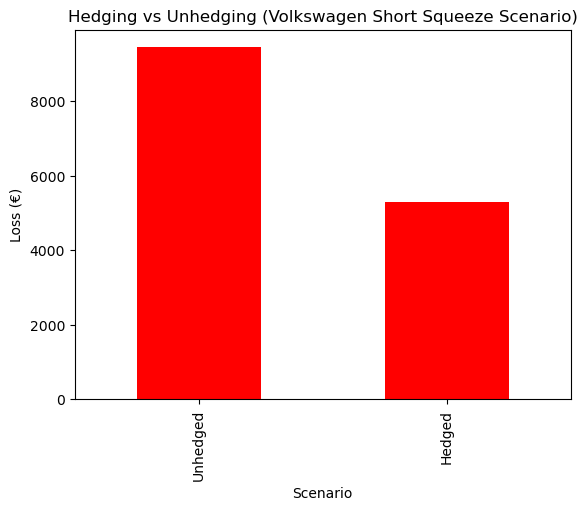

In [5]:
import numpy as np
import pandas as pd
import yfinance as yf
from scipy.stats import norm
import matplotlib.pyplot as plt

# Black-Scholes Option Pricing Model
def black_scholes(S, K, T, r, sigma, option_type='call'):
    """
    S = Current stock price
    K = Strike price
    T = Time to maturity (in years)
    r = Risk-free interest rate (annualized)
    sigma = Volatility (annualized)
    option_type = 'call' or 'put'
    """
    # Calculate d1 and d2
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    # Calculate call or put option price
    if option_type == 'call':
        option_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'put':
        option_price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    
    return option_price

# Function to retrieve historical data
def get_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

# Function to simulate the product's hedging performance
def test_product_savings(ticker, start_date, end_date, strike_price, time_to_maturity, 
                          risk_free_rate, volatility, shares_shorted):
    # Retrieve stock data
    stock_data = get_stock_data(ticker, start_date, end_date)
    
    # Assume the last closing price as the current stock price
    current_price = stock_data['Close'][-1]
    
    # Calculate the call option price using Black-Scholes
    option_price = black_scholes(S=current_price, K=strike_price, T=time_to_maturity, 
                                 r=risk_free_rate, sigma=volatility, option_type='call')
    
    # Simulate a short squeeze scenario where the stock price increases significantly
    # Assume the stock price goes up by 50% in the short squeeze
    short_squeeze_price = current_price * 1.5  # Example price during a squeeze
    
    # Calculate the unhedged loss if the stock price rises
    unhedged_loss_per_share = short_squeeze_price - current_price
    total_unhedged_loss = unhedged_loss_per_share * shares_shorted
    
    # Calculate the hedged position: exercising the call option during the short squeeze
    if short_squeeze_price > strike_price:
        option_profit_per_share = short_squeeze_price - strike_price
    else:
        option_profit_per_share = 0  # Option is not exercised if the squeeze price is below strike price
    
    total_hedged_profit = option_profit_per_share * shares_shorted
    total_hedged_loss = total_unhedged_loss - total_hedged_profit
    
    # Include the cost of the option
    hedging_cost = option_price * shares_shorted
    
    # Final outcome with hedging cost included
    total_hedged_loss_with_cost = total_hedged_loss + hedging_cost
    
    # Print the results
    print(f"Stock: {ticker}")
    print(f"Current Price: €{current_price:.2f}")
    print(f"Strike Price: €{strike_price:.2f}")
    print(f"Call Option Price (Per Share): €{option_price:.2f}")
    print(f"Hedging Cost (Total for {shares_shorted} shares): €{hedging_cost:.2f}")
    print(f"Maximum Unhedged Loss: €{total_unhedged_loss:.2f}")
    print(f"Maximum Hedged Loss (Including Costs): €{total_hedged_loss_with_cost:.2f}")
    print(f"Total Savings from Protection: €{total_unhedged_loss - total_hedged_loss_with_cost:.2f}")
    
    # Plotting the results for visual comparison
    results = pd.DataFrame({
        'Scenario': ['Unhedged', 'Hedged'],
        'Loss (€)': [total_unhedged_loss, total_hedged_loss_with_cost]
    })
    
    results.set_index('Scenario').plot(kind='bar', color=['red', 'green'], legend=False)
    plt.title('Hedging vs Unhedging (Volkswagen Short Squeeze Scenario)')
    plt.ylabel('Loss (€)')
    plt.show()

# Parameters for the test
ticker = "VOW3.DE"  # Volkswagen stock
start_date = "2008-01-01"
end_date = "2008-12-31"
strike_price = 40  # Adjusted strike price closer to current price
time_to_maturity = 2/12  # 2 months to maturity
risk_free_rate = 0.05  # Risk-free rate assumption (5%)
volatility = 1.5  # Assumed volatility
shares_shorted = 500  # Number of shares shorted

# Run the hedging test
test_product_savings(
    ticker=ticker,
    start_date=start_date,
    end_date=end_date,
    strike_price=strike_price,
    time_to_maturity=time_to_maturity,
    risk_free_rate=risk_free_rate,
    volatility=volatility,
    shares_shorted=shares_shorted
)


[*********************100%***********************]  1 of 1 completed

Stock: TSLA
Current Price: $225.17
Strike Price: $235.00
Call Option Price (Per Share): $60.36
Hedging Cost (Total for 50000 shares): $3017822.98
Maximum Unhedged Loss: $5629166.79
Maximum Hedged Loss (Including Costs): $3509489.39
Total Savings from Protection: $2119677.40



C:\Users\abdul\AppData\Local\Temp\ipykernel_29960\3240856269.py:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  current_price = stock_data['Close'][-1]


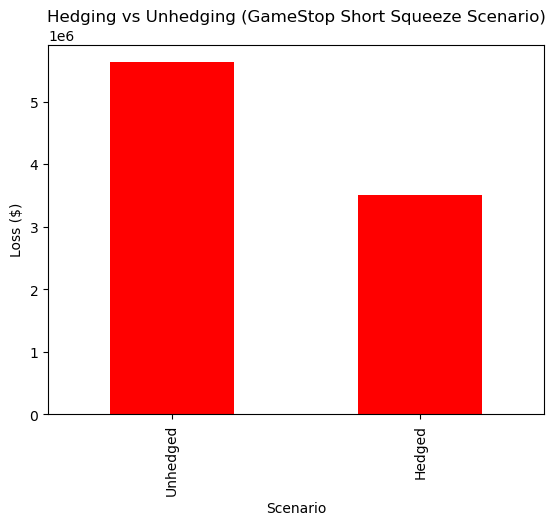

In [10]:
import numpy as np
import pandas as pd
import yfinance as yf
from scipy.stats import norm
import matplotlib.pyplot as plt

# Black-Scholes Option Pricing Model
def black_scholes(S, K, T, r, sigma, option_type='call'):
    """
    S = Current stock price
    K = Strike price
    T = Time to maturity (in years)
    r = Risk-free interest rate (annualized)
    sigma = Volatility (annualized)
    option_type = 'call' or 'put'
    """
    # Calculate d1 and d2
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    # Calculate call or put option price
    if option_type == 'call':
        option_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'put':
        option_price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    
    return option_price

# Function to retrieve historical data
def get_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

# Function to simulate the product's hedging performance
def test_product_savings(ticker, start_date, end_date, strike_price, time_to_maturity, 
                          risk_free_rate, volatility, shares_shorted):
    # Retrieve stock data
    stock_data = get_stock_data(ticker, start_date, end_date)
    
    # Assume the last closing price as the current stock price
    current_price = stock_data['Close'][-1]
    
    # Calculate the call option price using Black-Scholes
    option_price = black_scholes(S=current_price, K=strike_price, T=time_to_maturity, 
                                 r=risk_free_rate, sigma=volatility, option_type='call')
    
    # Simulate a short squeeze scenario where the stock price increases significantly
    # Assume the stock price goes up by 50% in the short squeeze
    short_squeeze_price = current_price * 1.5  # Example price during a squeeze
    
    # Calculate the unhedged loss if the stock price rises
    unhedged_loss_per_share = short_squeeze_price - current_price
    total_unhedged_loss = unhedged_loss_per_share * shares_shorted
    
    # Calculate the hedged position: exercising the call option during the short squeeze
    if short_squeeze_price > strike_price:
        option_profit_per_share = short_squeeze_price - strike_price
    else:
        option_profit_per_share = 0  # Option is not exercised if the squeeze price is below strike price
    
    total_hedged_profit = option_profit_per_share * shares_shorted
    total_hedged_loss = total_unhedged_loss - total_hedged_profit
    
    # Include the cost of the option
    hedging_cost = option_price * shares_shorted
    
    # Final outcome with hedging cost included
    total_hedged_loss_with_cost = total_hedged_loss + hedging_cost
    
    # Print the results
    print(f"Stock: {ticker}")
    print(f"Current Price: ${current_price:.2f}")
    print(f"Strike Price: ${strike_price:.2f}")
    print(f"Call Option Price (Per Share): ${option_price:.2f}")
    print(f"Hedging Cost (Total for {shares_shorted} shares): ${hedging_cost:.2f}")
    print(f"Maximum Unhedged Loss: ${total_unhedged_loss:.2f}")
    print(f"Maximum Hedged Loss (Including Costs): ${total_hedged_loss_with_cost:.2f}")
    print(f"Total Savings from Protection: ${total_unhedged_loss - total_hedged_loss_with_cost:.2f}")
    
    # Plotting the results for visual comparison
    results = pd.DataFrame({
        'Scenario': ['Unhedged', 'Hedged'],
        'Loss ($)': [total_unhedged_loss, total_hedged_loss_with_cost]
    })
    
    results.set_index('Scenario').plot(kind='bar', color=['red', 'green'], legend=False)
    plt.title('Hedging vs Unhedging (GameStop Short Squeeze Scenario)')
    plt.ylabel('Loss ($)')
    plt.show()

# Parameters for the GameStop short squeeze test
ticker = "TSLA"  # GameStop stock
start_date = "2021-01-01"  # Start date of the short squeeze (January 2021)
end_date = "2021-02-28"  # End date of the short squeeze (February 2021)
strike_price = 235  # Adjusted strike price closer to the price at the time of the squeeze
time_to_maturity = 1/12  # 1 month to maturity (approximate duration of squeeze)
risk_free_rate = 0.05  # Risk-free rate assumption (5%)
volatility = 2.5  # Volatility assumption (significantly high due to the squeeze)
shares_shorted = 50000  # Number of shares shorted

# Run the hedging test for GameStop
test_product_savings(
    ticker=ticker,
    start_date=start_date,
    end_date=end_date,
    strike_price=strike_price,
    time_to_maturity=time_to_maturity,
    risk_free_rate=risk_free_rate,
    volatility=volatility,
    shares_shorted=shares_shorted
)


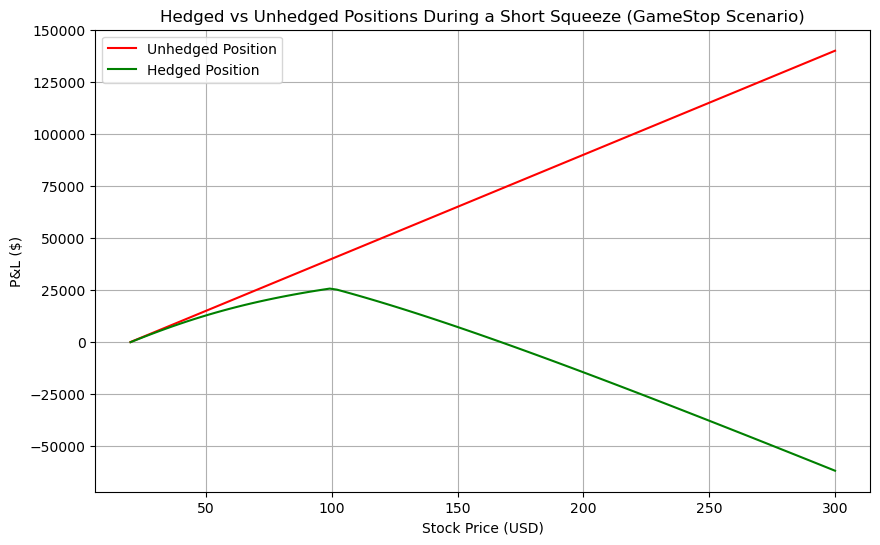

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

# Black-Scholes Option Pricing Model
def black_scholes(S, K, T, r, sigma, option_type='call'):
    """
    S = Current stock price
    K = Strike price
    T = Time to maturity (in years)
    r = Risk-free interest rate (annualized)
    sigma = Volatility (annualized)
    option_type = 'call' or 'put'
    """
    # Calculate d1 and d2
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    # Calculate call or put option price
    if option_type == 'call':
        option_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'put':
        option_price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    
    return option_price

# Function to simulate the movement of the hedged and unhedged positions
def simulate_positions(initial_price, strike_price, volatility, risk_free_rate, time_to_maturity, shares_shorted, squeeze_factor):
    # Simulate a range of stock prices from the initial price to a squeeze price
    prices = np.linspace(initial_price, initial_price * squeeze_factor, num=100)
    
    # Calculate the unhedged loss (short position loss)
    unhedged_loss = (prices - initial_price) * shares_shorted
    
    # Calculate the call option price at each stock price level (hedged position)
    option_prices = [black_scholes(S, strike_price, time_to_maturity, risk_free_rate, volatility, 'call') for S in prices]
    option_profit = [(max(S - strike_price, 0)) * shares_shorted for S in prices]  # Only profit if stock rises above strike price
    hedged_loss = unhedged_loss - np.array(option_profit) - np.array(option_prices) * shares_shorted  # Include cost of options
    
    return prices, unhedged_loss, hedged_loss

# Parameters for the GameStop short squeeze test
initial_price = 20  # Initial stock price of GameStop before the squeeze (in USD)
strike_price = 100  # Strike price for the call option
volatility = 2.5  # Volatility assumption (high due to the short squeeze)
risk_free_rate = 0.05  # Risk-free rate (5%)
time_to_maturity = 1/12  # 1 month to maturity (approximate duration of squeeze)
shares_shorted = 500  # Number of shares shorted
squeeze_factor = 15  # The stock price increases 15 times from initial price during the squeeze (from $20 to $300)

# Simulate the positions
prices, unhedged_loss, hedged_loss = simulate_positions(initial_price, strike_price, volatility, risk_free_rate, time_to_maturity, shares_shorted, squeeze_factor)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(prices, unhedged_loss, label="Unhedged Position", color="red")
plt.plot(prices, hedged_loss, label="Hedged Position", color="green")
plt.title("Hedged vs Unhedged Positions During a Short Squeeze (GameStop Scenario)")
plt.xlabel("Stock Price (USD)")
plt.ylabel("P&L ($)")
plt.legend()
plt.grid(True)
plt.show()
